In [1]:
import numpy as np

In [2]:
trn_N=np.load('Train_MFCC_N_2000.npy')
trn_S=np.load('Train_MFCC_S_2000.npy')

In [3]:
trn_D=np.concatenate((trn_N,trn_S),axis=0)

In [4]:
meanVec=np.mean(trn_D,axis=0)
stdVec=np.std(trn_D,axis=0)

In [5]:
norm_trn_D=np.zeros(trn_D.shape)

In [6]:
for i in range(len(norm_trn_D)):
  norm_trn_D[i]=(trn_D[i]-meanVec)/stdVec

In [7]:
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.models import Model

Using TensorFlow backend.


In [8]:
model_input = Input(shape=(trn_D.shape[1],), name='model_input')
model_output = Dense(1, activation='sigmoid',name='model_output')(model_input)
model = Model(model_input, model_output)
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_input (InputLayer)     (None, 60)                0         
_________________________________________________________________
model_output (Dense)         (None, 1)                 61        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(
 x = norm_trn_D
 , y = np.concatenate((np.zeros(shape=(trn_N.shape[0],),dtype=np.int8),np.ones(shape=(trn_S.shape[0],),dtype=np.int8)),axis=0)
 , batch_size = 32
 , shuffle = True
 , epochs = 10
)

Epoch 1/10
4000/4000 [==============================] - 1s 257us/step - loss: 0.9642 - accuracy: 0.3920
Epoch 2/10
4000/4000 [==============================] - 0s 76us/step - loss: 0.6500 - accuracy: 0.6277
Epoch 3/10
4000/4000 [==============================] - 0s 86us/step - loss: 0.4770 - accuracy: 0.7843
Epoch 4/10
4000/4000 [==============================] - 0s 76us/step - loss: 0.3759 - accuracy: 0.8652
Epoch 5/10
4000/4000 [==============================] - 0s 77us/step - loss: 0.3115 - accuracy: 0.9070
Epoch 6/10
4000/4000 [==============================] - 0s 76us/step - loss: 0.2678 - accuracy: 0.9287
Epoch 7/10
4000/4000 [==============================] - 0s 77us/step - loss: 0.2368 - accuracy: 0.9392
Epoch 8/10
4000/4000 [==============================] - 0s 77us/step - loss: 0.2135 - accuracy: 0.9427
Epoch 9/10
4000/4000 [==============================] - 0s 76us/step - loss: 0.1955 - accuracy: 0.9482
Epoch 10/10
4000/4000 [==============================] - 0s 75us/step - 

In [11]:
tst_N=np.load('Test_MFCC_N_500.npy')
tst_S=np.load('Test_MFCC_S_500.npy')

In [12]:
tst_D=np.concatenate((tst_N,tst_S),axis=0)

In [13]:
norm_tst_D=np.zeros(tst_D.shape)

In [14]:
for i in range(len(norm_tst_D)):
  norm_tst_D[i]=(tst_D[i]-meanVec)/stdVec

In [15]:
preds=model.predict(norm_tst_D)

In [16]:
TP=0
FP=0
TN=0
FN=0

In [17]:
for i in range(len(preds)):
  if(i<len(tst_N)):
    if(preds[i][0]<0.5):
      TN=TN+1
    else:
      FP=FP+1
  else:
    if(preds[i][0]>=0.5):
      TP=TP+1
    else:
      FN=FN+1


In [18]:
import matplotlib.pyplot as plt

(0.0, 1.0, 0.0, 1.0)

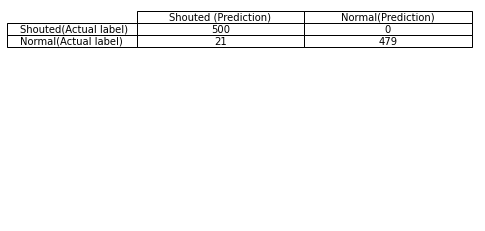

In [19]:
plt.table(cellText=[[TP,FN],[FP,TN]],cellLoc='center',colWidths=[0.5,0.5],rowLabels=['Shouted(Actual label)','Normal(Actual label)'],colLabels=['Shouted (Prediction)','Normal(Prediction)'],loc=0)
plt.axis('off')


In [20]:
print('TPR=',TP/(TP+FN))
print('TNR=',TN/(FP+TN))
print('FPR=',1-(TN/(FP+TN)))
print('ACC=',(TP+TN)/(TP+FN+FP+TN))

TPR= 1.0
TNR= 0.958
FPR= 0.04200000000000004
ACC= 0.979


In [21]:
print('PPV=',TP/(TP+FP))
print('NPV=',TN/(TN+FN))
TNR=TN/(FP+TN)
TPR=TP/(TP+FN)
print('BA=',(TNR+TPR)/2)
print('F1(P)=',(2*TP)/((2*TP)+FP+FN))
print('F1(N)=',(2*TN)/((2*TN)+FN+FP))

PPV= 0.9596928982725528
NPV= 1.0
BA= 0.979
F1(P)= 0.9794319294809011
F1(N)= 0.9785495403472931
